# Extraindo as Letras da Discografia da Lauren Jauregui

Lauren Michelle Jauregui Morgado (Miami, 27 de junho de 1996), mais conhecida como Lauren Jauregui, é uma cantora e compositora americana de ascendência cubana, conhecida mundialmente por ser ex-integrante do girl group Fifth Harmony, formado em 2012 através da segunda temporada do *talent show The X Factor US*.

Após o hiato indefinido do grupo, Jauregui lançou, em 24 de outubro de 2018, seu single de estreia solo intitulado *Expectations*, alcançando o primeiro lugar da parada Pop no iTunes dos Estados Unidos. Já em janeiro de 2019, ela lançou seu segundo single, a conceitual *More Than That*. Escrita pela cantora dois ou três anos antes de seu lançamento, a canção foi inspirada na deusa grega Afrodite. O álbum de estreia de Lauren, intitulado *PRELUDE*, debutou nas plataformas digitais em novembro de 2021.

Mais informações no link: https://pt.wikipedia.org/wiki/Lauren_Jauregui

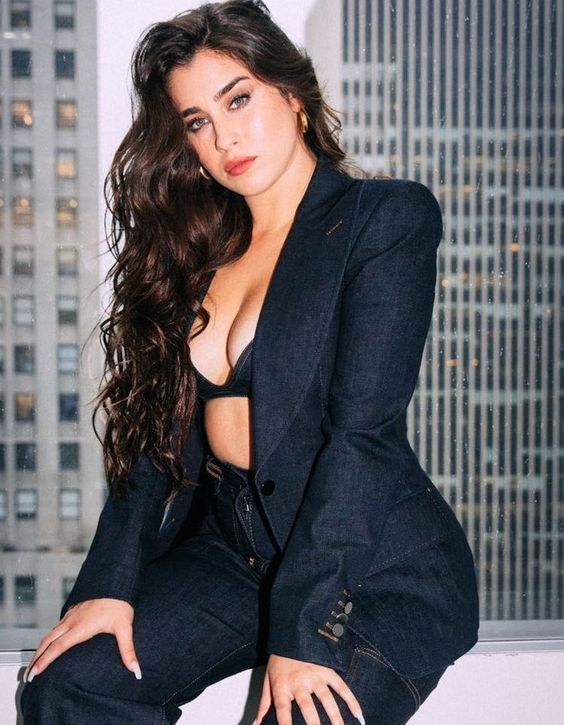

## API LyricsGenius

A API LyricsGenius é uma poderosa ferramenta que permite acessar uma vasta coleção de letras de músicas e informações sobre artistas. Desenvolvida pela Genius, uma plataforma conhecida por sua base de dados de letras e anotações, a API oferece funcionalidades que facilitam a busca por letras, detalhes de álbuns, informações sobre colaboradores e muito mais. Com suporte a consultas por nome de artista, título da música ou até mesmo trechos de letras, a API é especialmente útil para desenvolvedores que desejam integrar dados musicais em aplicativos e sites. Além disso, a API fornece recursos para obter anotações e interpretações das letras, enriquecendo a experiência do usuário ao explorar o significado das músicas. Através da LyricsGenius API, os amantes da música e os desenvolvedores podem aprofundar sua compreensão sobre as canções e seus criadores, trazendo um novo nível de interação com a música.

Mais informações e a documentação de como usar a API no link: https://docs.genius.com/

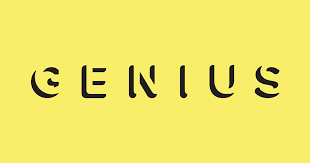



In [ ]:
import os
import pandas as pd
import requests
import lyricsgenius
import csv

# Chamada de Requisição
api_key = "YOUR_API_KEY"
genius = lyricsgenius.Genius(api_key)

# Busca do artista na API
artist = genius.search_artist("Lauren Jaregui", max_songs=50)

Searching for songs by Lauren Jaregui...

Changing artist name to 'Lauren Jauregui'
Song 1: "Expectations"
Song 2: "Lento"
Song 3: "More Than That"
Song 4: "50ft."
Song 5: "On Guard"
Song 6: "Invisible Chains"
Song 7: "Always Love"
Song 8: "Inside*"
Song 9: "Colors"
Song 10: "Trust Issues"
Song 11: "Toy*"
Song 12: "Burning"
Song 13: "Don’t Wanna Say"
Song 14: "Falling"
Song 15: "Sorry"
Song 16: "Scattered"
Song 17: "Temporary"
Song 18: "Freedom*"
Song 19: "Lento (Remix)"
Song 20: "The Day the World Blows Up"
Song 21: "Em(oceans)"
"Return to Love*" is not valid. Skipping.
Song 22: "Wolves"
Song 23: "Special Affair (Cover)"
Song 24: "Lento (Brabo Remix)"
Song 25: "All In My Feelings"
Couldn't find the lyrics section. Please report this if the song has lyrics.
Song URL: https://genius.com/Lauren-jauregui-intro-lyrics
Song 26: "Intro"
Song 27: "The One"
Song 28: "In Between"
"Magic" is not valid. Skipping.
Song 29: "Heart Breaker*"
Song 30: "Imagine (John Lennon Cover)"
Song 31: "Back to M

In [ ]:
# Importando para um arquivo json
artist.save_lyrics()

Wrote Lyrics_LaurenJauregui.json.


In [ ]:
# Acessando as chaves principais dos dados contidos no arquivo JSON
data = json.load(open("Lyrics_LaurenJauregui.json", "r"))
data.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'followers_count', 'iq', 'description_annotation', 'user', 'songs'])

In [ ]:
# Carregando dados em um dataframe e examinando os dados dentro de 'songs'
df = pd.DataFrame(data['songs'])
df.keys()

Index(['annotation_count', 'api_path', 'artist_names', 'full_title',
       'header_image_thumbnail_url', 'header_image_url', 'id',
       'lyrics_owner_id', 'lyrics_state', 'path', 'primary_artist_names',
       'pyongs_count', 'relationships_index_url', 'release_date_components',
       'release_date_for_display',
       'release_date_with_abbreviated_month_for_display',
       'song_art_image_thumbnail_url', 'song_art_image_url', 'stats', 'title',
       'title_with_featured', 'url', 'featured_artists', 'primary_artist',
       'primary_artists', 'apple_music_id', 'apple_music_player_url',
       'description', 'embed_content', 'featured_video', 'language',
       'recording_location', 'release_date', 'current_user_metadata',
       'song_art_primary_color', 'song_art_secondary_color',
       'song_art_text_color', 'album', 'custom_performances',
       'description_annotation', 'lyrics_marked_complete_by',
       'lyrics_marked_staff_approved_by', 'media', 'producer_artists',
     

In [ ]:
# Selecionando os dados úteis em um novo dataframe
df_oficial = df[['title', 'lyrics', 'release_date']].copy()

# Classificando as músicas pelo álbum
df_oficial['Album'] = df['album'].apply(lambda x: x.get('name') if isinstance(x, dict) else None)

# Eliminando músicas que não pertencem aos álbuns oficiais
df_oficial = df_oficial.drop(index=[10, 17, 18, 22, 23, 25, 29, 30, 32, 34, 35, 36, 37, 38, 39, 40])

# Reseta o índice, se necessário
df_oficial.reset_index(drop=True, inplace=True)

# Convertendo a coluna 'release_date' para o formato de data
df_oficial['release_date'] = pd.to_datetime(df_oficial['release_date'], errors='coerce')

# Extraindo apenas o ano da coluna 'release_date' para armazenar na 'release_year'
df_oficial['release_year'] = df_oficial['release_date'].dt.year

# Exibindo o dataframe resultante
df_oficial

,title,lyrics,release_date,Album,release_year
0,Expectations,"[Verse 1]\nUp in bed, all alone\nWondering whe...",2018-10-24,None,2018.0
1,Lento,"[Letra de ""Lento""]\n\n[Verso 1]\nCae la madrug...",2020-03-20,Lento - Single,2020.0
2,More Than That,[Intro]\nM-M-M-Murda\n\n[Verse 1]\nI see you w...,2019-01-11,None,2019.0
3,50ft.,"[Verse 1]\nYou know me, I'm not here for any o...",2020-04-17,None,2020.0
4,On Guard,[Verse 1: Lauren Jauregui]\nFeline with the in...,2021-11-03,Prelude,2021.0
5,Invisible Chains,[Chorus]\nI've been trapped in a cage\nSorrow ...,2020-02-07,Birds of Prey: The Album,2020.0
6,Always Love,[Verse 1]\nIt's kinda hard waking up in the mo...,2022-10-28,In Between,2022.0
7,Inside*,"[Verse 1]\nEvery time I try to, try to\nFind y...",2018-06-06,None,2018.0
8,Colors,[Intro]\nCan't be without you\nDon't wanna be ...,2021-10-08,Prelude,2021.0
9,Trust Issues,"[Verse 1]\nWhen I was young, my momma told me,...",2023-03-31,In Between,2023.0


In [ ]:
import nltk
from nltk.corpus import stopwords
import re

# Define uma função para remover stopwords de um texto
def remove_stopwords(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras que não estão na lista de stopwords em inglês
    text = [x for x in text if x not in stopwords.words('english')]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de stopwords em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_stopwords(x))

# Define uma função para remover pontuação do texto
def remove_ponctuation(text):
    # Usa uma expressão regular para manter apenas letras (maiúsculas e minúsculas) e junta as palavras em uma string
    return " ".join(re.findall("[a-zA-Z]+", text))

# Aplica a função de remoção de pontuação em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_ponctuation(x))

# Define uma função para remover palavras com menos de 3 caracteres do texto
def remove_words_with_less_3(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras com mais de 3 caracteres
    text = [x for x in text if len(x) > 3]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de palavras curtas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_words_with_less_3(x))

# Converte todo o texto em letras minúsculas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: x.lower())

# Cria uma nova coluna 'Word Count' no dataframe que conta o número de palavras em cada linha da coluna 'lyrics'
df_oficial['Word Count'] = df_oficial['lyrics'].apply(lambda x: len(x.split(' ')))

# Função para remover as palavras indesejadas
def remove_unwanted_words(text):
    words_to_remove = ["embed", "intro", "verse", "chorus", "outro", "instrumental"]
    pattern = r'\b(?:' + '|'.join(words_to_remove) + r')\b'
    return re.sub(pattern, '', text, flags=re.IGNORECASE)

# Aplicar a função na coluna de letras
df_oficial["lyrics"] = df_oficial["lyrics"].apply(remove_unwanted_words)

# Salvar o CSV atualizado
df_oficial.to_csv("LaurenJaureguiLyrics.csv", index=False)

In [ ]:
import sqlite3

# Criando um banco de dados de teste
conn = sqlite3.connect('LaurenJauregui.db')

# Salvando no banco de dados
df_oficial.to_sql('lyrics', conn, index=False)

# Verificando se os dados estão presentes no banco de dados
c = conn.cursor()
c.execute('''
SELECT * FROM LYRICS
          ''')
# Visualização do Banco de Dados gerado
c.fetchall()

[('Expectations',
  ' alone wondering been past three know club closed already seven scenarios bout changed mind knowing well told come home happened every time  wish expectations wish could head with confrontation really wish could talk instead tears turned side fucking wish expectations expect expect expect  mean need play play need side communicate respect time respect space respect energy cause waiting night warm thought  wish expectations really wish could head with confrontation really wish could talk instead tears turned side fucking wish expectations expect expect expect guitar solo  wish expectations wish could head with confrontation confrontations really wish could talk instead instead tears turned side fucking wish expectations expect expect expect',
  '2018-10-24 00:00:00',
  None,
  2018.0,
  113),
 ('Lento',
  'letra lento verso madrugada noche acaba empezar energ elevada luces apagadas solo luna coro acelera ambiente humo sube mente pongas impaciente jamelo bailando ent